In [1]:
# import packages 
import drawSvg as draw
import random as ra

# define the width and height of the drawing window as x and y
WINDOW_X = 200
WINDOW_Y = 200

# defines the number of balls in your simulation
num_ball = 10
# defines the ball radius
r_ball = 5

# define list that store the x,y location of each ball and the velocity of each ball, vx,vy
x = []
y = []
vx = []
vy = []

# random generate a series of vx between -5 and 5
for num in range(num_ball):
    r = ra.uniform(-5,5)
    vx.append(r)
    
# random generate a series of vy between -5 and 5
for num in range(num_ball):
    r = ra.uniform(-5,5)
    vy.append(r)

# random generate x position within the canvas size
for num in range(num_ball):
    r = ra.uniform(-WINDOW_X/2 + r_ball, WINDOW_X/2 - r_ball )
    x.append(r)

# random generate y position within the canvas size
for num in range(num_ball):
    r = ra.uniform(-WINDOW_Y/2 + r_ball, WINDOW_Y/2 - r_ball)
    y.append(r)

C:\Users\sherr\anaconda3\lib\site-packages\drawSvg\raster.py:18: RuntimeWarning: Failed to import CairoSVG. drawSvg will be unable to output PNG or other raster image formats. See https://github.com/cduck/drawSvg#prerequisites for more details.
Original OSError: no library called "cairo" was found
no library called "libcairo-2" was found
cannot load library 'libcairo.so': error 0x7e
cannot load library 'libcairo.2.dylib': error 0x7e
cannot load library 'libcairo-2.dll': error 0x7e
  warnings.warn(msg, RuntimeWarning)


In [2]:
# This function takes as input an index i and updates the location of the ball at the corresponding position in the ball list. 
def update_position(i):
    for num in range(0, i):
        if abs(x[num]) >= (WINDOW_X/2 - r_ball): # checking if the ball hits the boarder of x direction, if so, reverse it's vx direcation
            vx[num] = -vx[num]  
        if abs(y[num]) >= (WINDOW_Y/2 - r_ball): # checking if the ball hits the boarder of y direction, if so, reverse it's vy direcation
            vy[num] = -vy[num]
        
    # compare each x position, if the distance between 2 balls is equal or less than 2*radius, flip both ball's v and update it's position
        for j in range(num + 1, i):
            if abs((x[num] - x[j])) <= (2 * r_ball) and abs((y[num] - y[j])) <= (2 * r_ball):
                # filp both balls vx and vy
                vx[num] = -vx[num]  
                vx[j] = -vx[j]
                
                vy[num] = -vy[num]
                vy[j] = -vy[j]
                
                # update both balls location based on the updated v, timestep is 1 in this case
                x[num] = x[num] + 1 * vx[num]
                x[j] = x[j] + 1 * vx[j]
                
                y[num] = y[num] + 1 * vy[num]
                y[j] = y[j] + 1 * vy[j]
            
        # update x location for each ball in the list using the vx per timestamp(1 in this case)
        x[num] = x[num] + 1 * vx[num] 
        # update y location for each ball in the list using the vy per timestamp(1 in this case)
        y[num] = y[num] + 1 * vy[num] 
    
    return x, y

In [3]:
# This function takes as input an index i and draws the corresponding ball at this position in the ball list.
def draw_ball(i):
    for num in range(i):
        D.append(draw.Circle(x[num], y[num], r_ball,
            fill='red'))
    return

In [4]:
# This function is called by the animation code and iteratively updates the position of each ball and then draws each ball
def draw_frame():
    update_position(num_ball)
    draw_ball(num_ball)
    return D

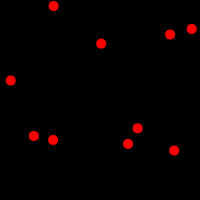

In [ ]:
# Use the animate function to render the ball movement
with draw.animate_jupyter(draw_frame, delay=0.05) as anim:
    while( True ):
        D = draw.Drawing(WINDOW_X, WINDOW_Y, origin='center' ) # erase canvas
        D.append(draw.Rectangle(-WINDOW_X/2,-WINDOW_Y/2,WINDOW_X,WINDOW_Y, fill='black'))
        anim.draw_frame()